In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#人工データを作成
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.02, random_state=0)  #ラベル付き円を作成
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#x軸y軸を説明変数としてロジスティック回帰を適用
clf = LogisticRegression()
X_train = X
y_train = y
clf.fit(X_train, y_train)
accuracy_score(y_train, clf.predict(X_train))

0.5

In [3]:
#2次変換
#モデルの生成
clf_q = LogisticRegression()
Z = (X[:, 0]**(2) + X[:, 1]**(2)).reshape(-1, 1)
X_train = Z
y_train = y
clf_q.fit(X_train, y_train)
accuracy_score(y_train, clf_q.predict(X_train))

1.0

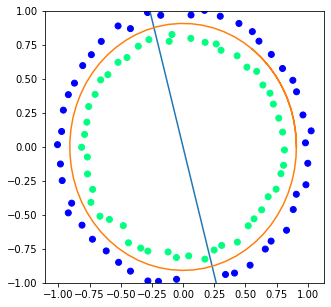

In [4]:
plt.figure(figsize=(5,5))
#通常の方法
x_=np.linspace(-1,1,100)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter')
#log(p/(1-p)=1/2となる線を描画する
plt.plot(x_,(-1*(clf.coef_[:,0]*x_)-clf.intercept_)/clf.coef_[:,1])
plt.ylim([-1,1])

#2次変換
theta = np.arange(0,2*np.pi+1,0.1)
xlist=[];ylist=[]
r =  ((clf_q.intercept_/(-1*clf_q.coef_))**(1/2))[0,0] #半径
for i in theta:
	xlist.append(r*np.cos(i))
	ylist.append(r*np.sin(i))
plt.plot(xlist,ylist)

In [5]:
#三角形の合同問題
from pandas import DataFrame
#例として合同な三角形を考えるため描画ライブラリを読み込む

#乱数設定
np.random.seed(1)
ran_l1 = list(np.random.rand(10) * 5)
np.random.seed(2)
ran_l2 = list(np.random.rand(10))

#三角形の座標データを作成
base1 = np.array([0, 1, -1, 0, 1, 0])
base2 = np.array([0, 0, 1, 0, 0, np.sqrt(3)])
data = np.vstack([base1 - i
                  for i in ran_l1[0:5]] + [base2 - i for i in ran_l1[5:]])
l = []
for i, j in zip(data, ran_l2):
    theta = (2 * j) * np.pi
    l.append(
        np.dot(
            np.array([[np.cos(theta), -np.sin(theta)],
                      [np.sin(theta), np.cos(theta)]]),
            i.reshape(3, 2).T).T.reshape(-1))

data = np.vstack(l)

df_data = DataFrame(data, columns=['x1', 'y1', 'x2', 'y2', 'x3', 'y3'])

In [6]:
print (df_data)

         x1        y1        x2        y2        x3        y3
0  2.343474  0.182421  3.655096  0.711237  1.814658  1.494043
1 -3.132011 -3.151291 -3.956592 -4.300232 -1.983070 -3.975872
2  0.307368 -0.950990  0.952078  0.307719 -0.951341 -0.306280
3  1.590803 -0.127551  2.904648  0.395719  1.067534  1.186295
4  0.516118 -0.585601  1.873263 -0.187910  0.118427  0.771544
5  0.627389 -0.180843  0.143793  0.694448 -0.888660 -1.018456
6  0.631948 -1.155545  0.913059 -0.195870 -1.030258 -0.668648
7  0.087938  2.441900 -0.644159  1.760700  1.267812  1.173872
8  2.497011 -1.279123  2.190059 -0.327398  0.848576 -1.810781
9  2.963352 -2.394728  2.857820 -1.400312  1.240973 -2.577514


[2.34347398 0.18242058 3.65509644 0.71123675 1.81465781 1.49404304] 0
[-3.13201072 -3.15129064 -3.95659212 -4.30023168 -1.98306968 -3.97587204] 1
[ 0.30736808 -0.95098989  0.95207841  0.30771921 -0.95134102 -0.30627956] 2
[ 1.59080305 -0.12755061  2.9046483   0.39571859  1.06753385  1.18629464] 3
[ 0.51611779 -0.58560062  1.87326272 -0.18791024  0.11842741  0.77154431] 4
[ 0.62738876 -0.18084289  0.14379263  0.69444837 -0.88866017 -1.01845596] 5
[ 0.63194826 -1.1555452   0.91305872 -0.19586978 -1.03025832 -0.6686476 ] 6
[ 0.08793805  2.44190043 -0.64415859  1.76069965  1.26781242  1.17387185] 7
[ 2.49701142 -1.27912289  2.19005871 -0.32739813  0.84857577 -1.81078059] 8
[ 2.96335173 -2.39472758  2.85781972 -1.40031167  1.24097286 -2.57751439] 9


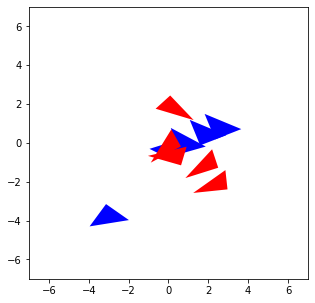

In [7]:
#描画する
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)

for k, i in enumerate(data):
  print(i, k)
  if k < 5:
      tri = plt.Polygon(
          ((i[0], i[1]), (i[2], i[3]), (i[4], i[5])), fc="blue")
      ax.add_patch(tri)
  else:
      tri = plt.Polygon(((i[0], i[1]), (i[2], i[3]), (i[4], i[5])), fc="red")
      ax.add_patch(tri)
plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.show()

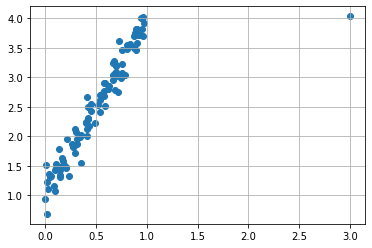

In [8]:
#人工的にデータを作成
#y ~ N(3x+1,0.2) に従う(x in [0,1])
np.random.seed(seed=1)
x = np.random.rand(100)
y = np.random.normal(3 * x + 1, 0.2)
#xの外れ値を作成
x = np.where(x == max(x), 3, x)
plt.scatter(x=x, y=y)
plt.grid()

In [9]:
#ランク算出のためのライブラリインポート
from scipy.stats import rankdata
#正規分布の累積分布関数の逆関数を計算するためにインポート
from scipy.stats import norm
#ランク変換関数定義
def rank_fit_transform(x):
  return (norm.ppf((rankdata(x) - (3 / 8)) / (len(x) + (1 / 4))))

In [10]:
#線形回帰モデルの準備
from sklearn import linear_model

#ランク変換前
clf = linear_model.LinearRegression()
X = x.reshape(-1, 1)
y = y
clf.fit(X, y)
clf.score(X, y)

#ランク変換後
clf_r = linear_model.LinearRegression()
X_r = rank_fit_transform(x).reshape(-1, 1)
y = y
clf_r.fit(X_r, y)
clf_r.score(X_r, y)
#決定係数
print("変換前_{:.5g}".format(clf.score(X, y)), "変換後_{:.5g}".format(
	clf_r.score(X_r, y)))

変換前_0.71387 変換後_0.91283


Text(0.5, 1.0, 'After')

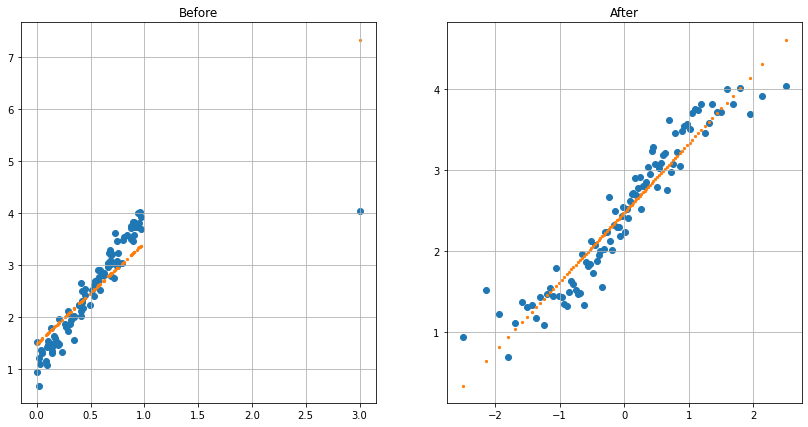

In [11]:
#直線当てはめを描画
plt.figure(figsize=(14, 7))
#変換なし
plt.subplot(1,2,1)
plt.scatter(X, y)
plt.scatter(X, clf.predict(X), s=5)
plt.grid()
plt.title('Before')
#ランク変換後
plt.subplot(1,2,2)
plt.scatter(X_r, y)
plt.scatter(X_r, clf_r.predict(X_r), s=5)
plt.grid()
plt.title('After')

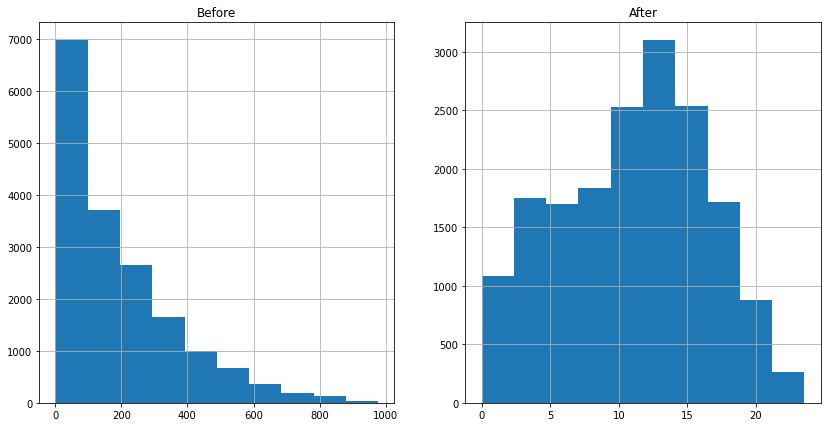

In [12]:
#必要なライブラリ読み込む
from scipy import stats  #boxcox変換のため
from sklearn import linear_model  #線形回帰モデル
from sklearn.model_selection import train_test_split  #訓練データ分割
#UCI よりレンタル自転車のデータを読み込む
df = pd.read_csv('hour.csv')
#描画準備
plt.figure(figsize=(14, 7))
#cntの変換前ヒストグラム
plt.subplot(1, 2, 1)
plt.hist(df['cnt'])
plt.title('Before')
plt.grid()
#box-cox変換後の分布
plt.subplot(1, 2, 2)
bc, _ = stats.boxcox(df['cnt'])
plt.hist(bc)
plt.title('After')
plt.grid()

In [13]:
#データを訓練データとテストデータに分離
X = df['temp'].values
y = df['cnt'].values
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.2, random_state=0)

#変換
y_train_bc, lambd = stats.boxcox(y_train)

#変換前回帰
clf = linear_model.LinearRegression()
clf.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))

#変換後回帰
clf_bc = linear_model.LinearRegression()
clf_bc.fit(X_train.reshape(-1, 1), y_train_bc.reshape(-1, 1))

LinearRegression()

Text(0.5, 1.0, 'After')

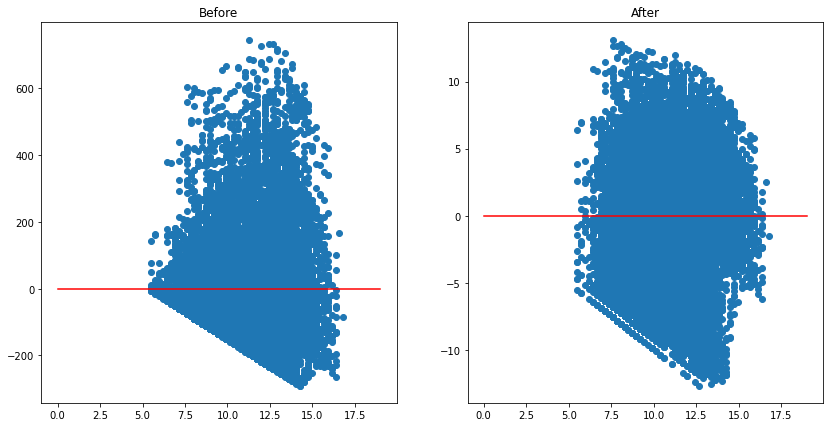

In [14]:
#残差プロット
#比較用y=0の線
x = np.arange(0, 20)
y = 0 * x

plt.figure(figsize=(14, 7))
#変換前
plt.subplot(1,2,1)
plt.scatter(
    clf_bc.predict(X_train.reshape(-1, 1)),
    y_train.reshape(-1, 1) - clf.predict(X_train.reshape(-1, 1)))
plt.plot(x, y, color='red')
plt.title('Before')
#変換後
plt.subplot(1,2,2)
plt.scatter(
    clf_bc.predict(X_train.reshape(-1, 1)),
    y_train_bc.reshape(-1, 1) - clf_bc.predict(X_train.reshape(-1, 1)))
plt.plot(x, y, color='red')
plt.title('After')